# Visualizing Textual Data Using Word Clouds

Textual data is also known as unstructured data; there is no set structure for the data to take on, which makes it hard for analysis.

Word clouds are a great way of visualizing unstructured data.


<img src="https://wordcloudapi.com/word_cloud.png" width="40%"/>
<img src="http://www.covidsoclab.org/wp-content/uploads/2020/07/wordcloud_crop.png" width="52%"/>

# Requirements
Connect your Google Colab and Google Drive accounts so that we can read the necessary data files.

Prepare input text files. Sample text is from reviews on stories about cats. Any plain text (.txt) file will do.

(Optional) Prepare silhoutte mask (.jpg) files, samples provided.

# Key Ideas and Steps

prepare python libraries (wordcloud, numpy, google authenticate)
load .txt text files
process word count vectorizations
generate wordcloud
apply silhouette mask (optional)

## Installing the wordcloud module

PIP is a package installer, often named "Preferred Installer Program." It is used to install packages for the Python interpreter to use.

In [ ]:
!pip install wordcloud

# Importing required modules

In [ ]:
# Allows you to work with directories
from os import path

# Module to work with images
from PIL import Image

# Scientific Computation and Linear Algebra for Python
import numpy as np

# Module to graph things out
import matplotlib.pyplot as plt

# The specific module we will need to generate Word Clouds!
from wordcloud import WordCloud, STOPWORDS

# Connect Colab with Google Drive

Is needed in order to access the pictures that we will be turning into word clouds from our Drive.

To do, go to the 'file' tab on the left side of the screen, go to the top that has a dark grey folder with the drive symbol, click it and the code should pop up


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

The following function is meant to read a file given a path to its location in the Drive.

In [ ]:
def read_text_file(file_path):
  """ 
  Passes the path of a file
  reads the file, saves it in a variable
  returns that variable :)
  """
  
  with open(file_path) as file:
     read_file = file.read()
  
  return read_file

#Getting the File
Here we are reading in the file and printing out the first 150 words to make sure it worked

In [ ]:
read_file = read_text_file('/content/sample_data/AMONGUSTEXT.txt')
print(read_file[0:850]) #print the first 150 characters

In the game Among Us, on a long enough timeline, absolutely everything and everyone will be declared as “pretty sus” at some point. “Sus” is a convenient shorthand for suspicious; it’s easy to type, even on a mobile device, and it gets your point across quickly. You may not have seen a little bean kill someone in the reactor core, but you’re pretty sure they were up there at some point, or they ran at you in a funny way. That’s all pretty sus.

“Sus” is a gut feeling without evidence, and there’s a reason why Among Us fans have started using it in their everyday vocabularies — sometimes those gut feelings pay off. As a player, it feels amazing to pull some detective work based off in-game body language or someone idling in the wrong place.
But sometimes a player convincingly lays out a steel cage of logic that proves that someone else in 


#Modifying the file
Here we  are modyfying the file by removing all non-word characters and storing it in a variable named ***text***, then using one of our imported files we can simply count it and see what are the most commont words

In [ ]:
from collections import Counter
import re

text = re.sub("[^\w ]", "", read_file) # remove non-word characters
words = text.split(" ") # simple space-based tokenizer
print(words)
Counter(words).most_common(25)

['In', 'the', 'game', 'Among', 'Us', 'on', 'a', 'long', 'enough', 'timeline', 'absolutely', 'everything', 'and', 'everyone', 'will', 'be', 'declared', 'as', 'pretty', 'sus', 'at', 'some', 'point', 'Sus', 'is', 'a', 'convenient', 'shorthand', 'for', 'suspicious', 'its', 'easy', 'to', 'type', 'even', 'on', 'a', 'mobile', 'device', 'and', 'it', 'gets', 'your', 'point', 'across', 'quickly', 'You', 'may', 'not', 'have', 'seen', 'a', 'little', 'bean', 'kill', 'someone', 'in', 'the', 'reactor', 'core', 'but', 'youre', 'pretty', 'sure', 'they', 'were', 'up', 'there', 'at', 'some', 'point', 'or', 'they', 'ran', 'at', 'you', 'in', 'a', 'funny', 'way', 'Thats', 'all', 'pretty', 'susSus', 'is', 'a', 'gut', 'feeling', 'without', 'evidence', 'and', 'theres', 'a', 'reason', 'why', 'Among', 'Us', 'fans', 'have', 'started', 'using', 'it', 'in', 'their', 'everyday', 'vocabularies', '', 'sometimes', 'those', 'gut', 'feelings', 'pay', 'off', 'As', 'a', 'player', 'it', 'feels', 'amazing', 'to', 'pull', 'so

[('the', 40),
 ('a', 28),
 ('and', 26),
 ('in', 17),
 ('to', 15),
 ('of', 13),
 ('was', 12),
 ('game', 11),
 ('it', 9),
 ('you', 8),
 ('that', 8),
 ('The', 8),
 ('for', 7),
 ('they', 7),
 ('I', 7),
 ('Us', 6),
 ('pretty', 6),
 ('sus', 6),
 ('at', 6),
 ('Among', 5),
 ('on', 5),
 ('someone', 5),
 ('or', 5),
 ('with', 5),
 ('as', 4)]

#Word Clouds Finally

Now that the setup is all complete, we can finaly gerneate our first word cloud, but we can still impove!

(-0.5, 399.5, 199.5, -0.5)

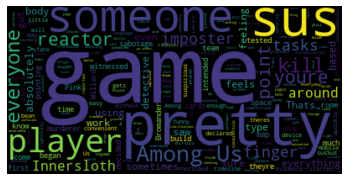

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#Time to Improve!
Now lets make the word cloud more interesting


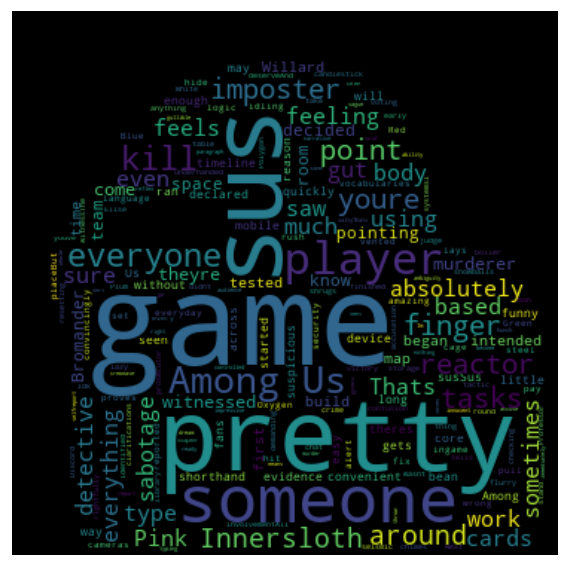

In [ ]:
# create mask
image_mask = np.array(Image.open('/content/drive/MyDrive/Word Cloud Recources (1)/silhouettes/AMONGUS.JPG'))

# remove stopwords, words that we want to ignore
stopwords = set(STOPWORDS)
stopwords.add("said")

# generate word cloud, customixe how it will look, # of words, #image mask, stopwords etc
wc = WordCloud(max_words=2000, 
               mask=image_mask,
               stopwords=stopwords)
wc.generate(text)

# plot the word cloud, like a graph we need to define how it will look
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('N.png')

#Parameters#
----------
*   **font_path** : string
    >Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font; you need to adjust this path.

* **width** : int (default=400)
    >Width of the canvas.

* **height** : int (default=200)
  >  Height of the canvas.

* **prefer_horizontal** : float (default=0.90)
  >  The ratio of times to try horizontal fitting as opposed to vertical.
    If prefer_horizontal < 1, the algorithm will try rotating the word
    if it doesn't fit. (There is currently no built-in way to get only
    vertical words.)

* **mask** : nd-array or None (default=None)
  >  If not None, gives a binary mask on where to draw words. If mask is not
    None, width and height will be ignored, and the shape of mask will be
    used instead. All white (#FF or #FFFFFF) entries will be considered
    "masked out" while other entries will be free to draw on. [This
    changed in the most recent version!]

* **contour_width**: float (default=0)
  >  If mask is not None and contour_width > 0, draw the mask contour.

* **contour_color**: color value (default="black")
  >  Mask contour color.

* **scale** : float (default=1)
  >  Scaling between computation and drawing. For large word-cloud images,
    using scale instead of larger canvas size is significantly faster, but
    might lead to a coarser fit for the words.

* **min_font_size** : int (default=4)
  >  Smallest font size to use. Will stop when there is no more room in this
    size.
* **font_step** : int (default=1)
  >  Step size for the font. font_step > 1 might speed up computation but
    give a worse fit.
* **max_words**: number (default=200)
 >   The maximum number of words.

* **stopwords** : set of strings or None
  >  The words that will be eliminated. If None, the build-in STOPWORDS
    list will be used.

* **background_color** : color value (default="black")
  >  Background color for the word cloud image.

* **max_font_size** : int or None (default=None)
  >  Maximum font size for the largest word. If None, the height of the image is
    used.

* **mode** : string (default="RGB")
  >  Transparent background will be generated when mode is "RGBA" and
    background_color is None.

* **relative_scaling**: float (default=.5)
  >  Importance of relative word frequencies for font-size.  With
    relative_scaling=0, only word-ranks are considered.  With
    relative_scaling=1, a word that is twice as frequent will have twice
    the size.  If you want to consider the word frequencies and not only
    their rank, relative_scaling around .5 often looks good.


* **color_func** : callable, default=None
  >  Callable with parameters word, font_size, position, orientation,
    font_path, random_state that returns a PIL color for each word.
    Overwrites "colormap".
    See colormap for specifying a matplotlib colormap instead.

* **regexp** : string or None (optional)
  >  Regular expression to split the input text into tokens in process_text.
    If None is specified, ``r"\w[\w']+"`` is used.

* **collocations** : bool, default=True
  >  Whether to include collocations (bigrams) of two words.

* **colormap** : string or matplotlib colormap, default="viridis"
  >  Matplotlib colormap to randomly draw colors from for each word.
    Ignored if "color_func" is specified.

* **normalize_plurals** : bool, default=True
  >  Whether to remove trailing 's' from words. If True and a word
    appears with and without a trailing 's', the one with trailing 's'
    is removed and its counts are added to the version without
    trailing 's' -- unless the word ends with 'ss'.

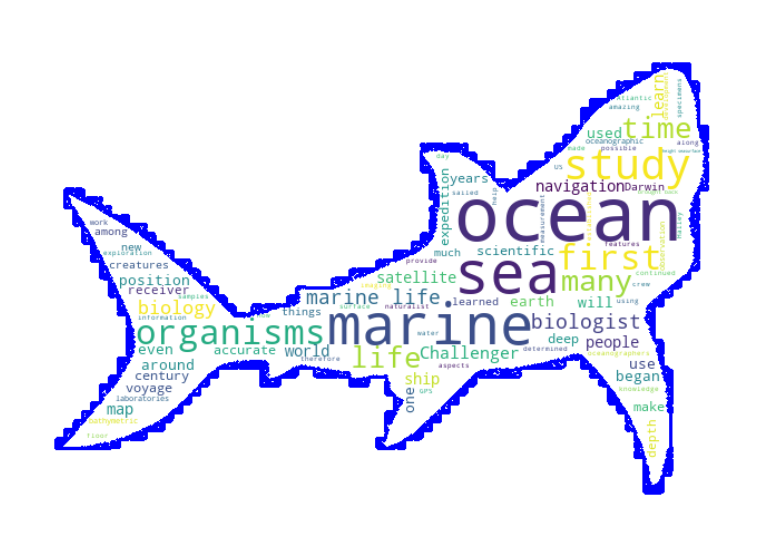

In [ ]:
file_path = '/content/drive/MyDrive/Word Cloud Recources (1)/Word Cloud Files/sea_text.txt'
image_path= '/content/drive/MyDrive/Word Cloud Recources (1)/silhouettes/jaws.jpg'

read_file = read_text_file(file_path)

text = re.sub("[^\w ]", "", read_file) # remove non-word characters
words = text.split(" ") # simple space-based tokenizer
Counter(words).most_common(25)


# create mask
image_mask = np.array(Image.open(image_path))

# remove stopwords, words that we want to ignore
stopwords = set(STOPWORDS)
stopwords.add("said")

# generate word cloud, customixe how it will look, # of words, #image mask, stopwords etc
wc = WordCloud(max_words=2000, 
               mask=image_mask, 
               background_color="white",
               contour_color="blue",
               contour_width=2, 
               stopwords=stopwords)
wc.generate(text)

# plot the word cloud, like a graph we need to define how it will look
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('N.png')

# Advanced Word Clouds!
##Create a wordcloud without using .txt files



In [ ]:
from collections import Counter
import pandas as pd

#reading a .csv file instead of a .txt file
homelessness_data = pd.read_csv('/content/drive/MyDrive/Word Cloud Recources (1)/Word Cloud Files/2020_PIT_final_data - deduped_data - scrubbed.csv')
#slecting the column
city_data = homelessness_data["Contributing_Factors"]
#confiming data can be accesed
Counter(city_data).most_common(25)

[(nan, 809),
 ('Other', 421),
 ('LackOfIncome', 209),
 ('Unemployment', 188),
 ('DoesntKnow', 94),
 ('Runaway', 72),
 ('Unemployment,LackOfIncome', 61),
 ('JailDischarge', 58),
 ('MentalIllness', 52),
 ('LackOfIncome,Unemployment', 23),
 ('Unemployment,Other', 17),
 ('LackOfIncome,Other', 16),
 ('MedicalDischarge', 13),
 ('Unemployment,LackOfIncome,MentalIllness', 9),
 ('Unemployment,LackOfIncome,Other', 9),
 ('MentalIllness,Other', 7),
 ('Other,DoesntKnow', 7),
 ('Other,Unemployment', 7),
 ('Runaway,Other', 7),
 ('Other,MentalIllness', 6),
 ('Unemployment,LackOfIncome,MedicalDischarge', 5),
 ('Unemployment,MentalIllness', 5),
 ('MentalIllness,Unemployment,LackOfIncome', 5),
 ('Unemployment,LackOfIncome,Runaway', 4),
 ('Unemployment,LackOfIncome,JailDischarge', 4)]

In [ ]:
data_string = ""
# for incase city in city_data is more than one word:
data_string = " ".join(city_data)

wordcloud = WordCloud().generate(data_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

TypeError: ignored

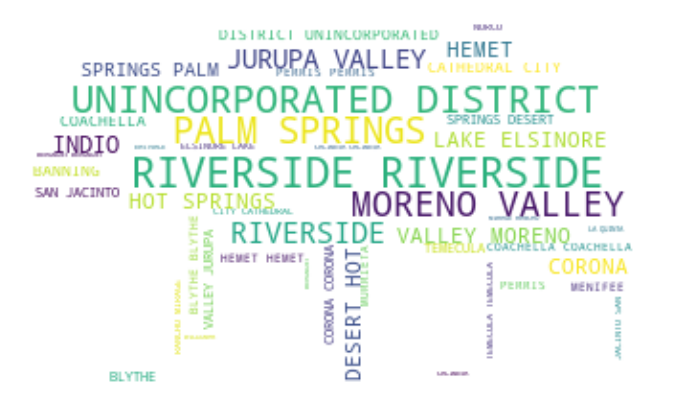

In [ ]:
image_path= '/content/drive/MyDrive/Word Cloud Recources (1)/silhouettes/bear.png'

# create mask
image_mask = np.array(Image.open(image_path))

wc = WordCloud(background_color="white",
               mode="RGBA", 
               mask=image_mask).generate(data_string)

# create coloring from image then plot the word cloud
plt.figure(figsize=(7,7), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('N.png')


##Create A wordcloud but with colors!
You'll need to import ImageColorGenerator


In [ ]:
from wordcloud import ImageColorGenerator

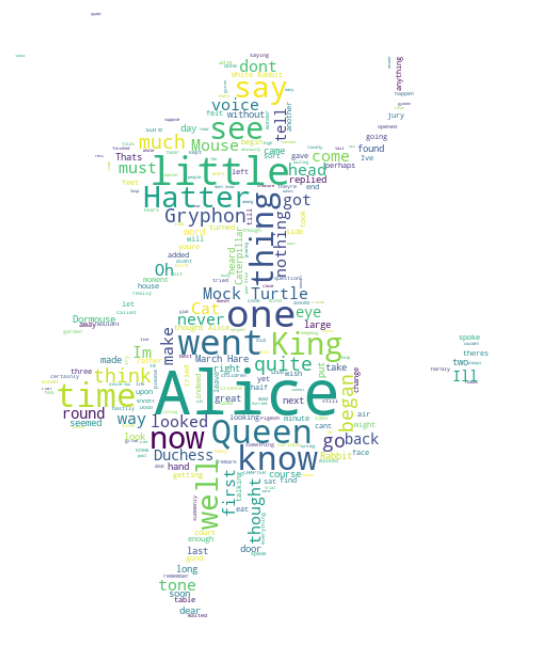

In [ ]:
file_path = '/content/drive/MyDrive/Word Cloud Recources (1)/Word Cloud Files/AliceInWonderland.txt'
image_path= '/content/drive/MyDrive/Word Cloud Recources (1)/silhouettes/alice.jpg'

read_file = read_text_file(file_path)

text = re.sub("[^\w ]", "", read_file) # remove non-word characters
words = text.split(" ") # simple space-based tokenizer
Counter(words).most_common(25)


# create mask
image_mask = np.array(Image.open(image_path))

# remove stopwords, words that we want to ignore
stopwords = set(STOPWORDS)
stopwords.add("said")


wc = WordCloud(stopwords=stopwords, 
              #  max_font_size=40, 
               background_color="white", 
               mode="RGBA", 
               max_words=300, 
               mask=image_mask).generate(text)


#--------------------------------------------------------------
#Here is what allows you to choose your own colors
# create coloring from image then plot the word cloud
image_colors = ImageColorGenerator(image_mask)
plt.figure(figsize=(7,7), dpi=120)
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
#--------------------------------------------------------------

plt.axis("off")
plt.show()

wc.to_file('N.png')

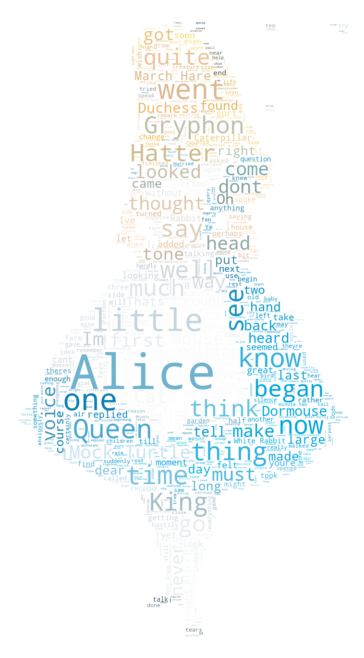

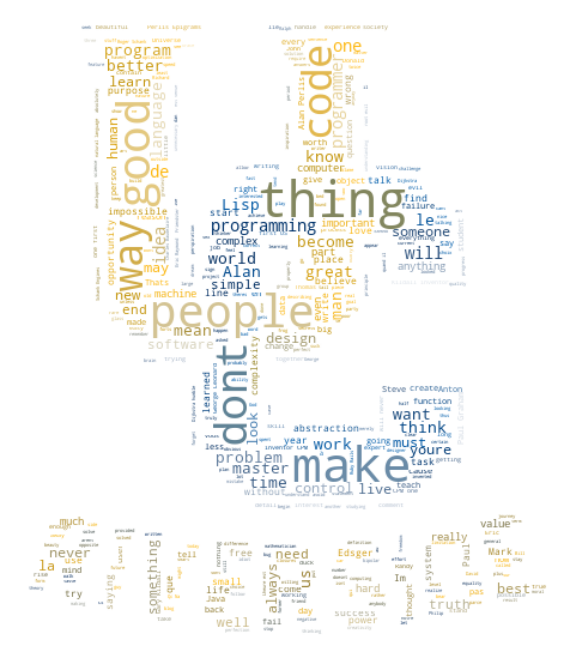

#*Challenge!*
### Create your very own unique wordcloud for us to see next time!
### Some Word Cloud Ideas: 


*   Black and White
*   Your own text file (maybe of a book, or a movie script, etc )
*   Work with our csv files instead of txt files
*   Word Clouds in the format of a country's flag
*   Play with attributes (to add borders, custom sizing etc)
*   Something so cool and so unique that we would want to give you a high five

API Reference for word clouds: http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html




